IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

SIGMOID FUNCTION

In [2]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

def random_sigmoid(v):
    return sigmoid(v) + random.uniform(-0.05, 0.05)

DATA CREATION

In [3]:
data_set = pd.DataFrame()
data_set['x'] = [i for i in range(-100, 100)]
data_set['y'] = [1 if random_sigmoid(i) >= 0.5 else 0 for i in range(-100, 100)]

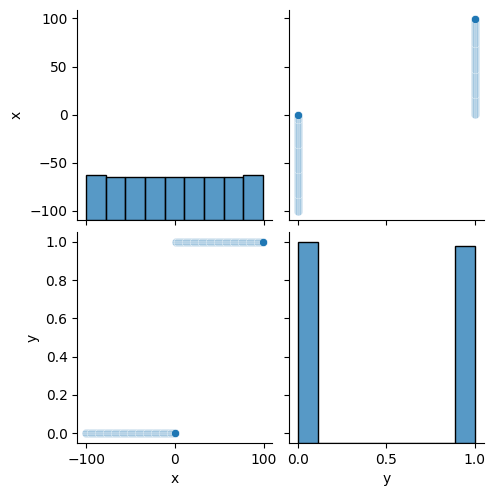

In [4]:
%matplotlib inline
sns.pairplot(data_set)

DATA SHUFFELING AND SELECTION

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_set, train_size=0.9, random_state=100)

In [6]:
train_x = train['x'].array.reshape(-1, 1)
train_y = train['y']
test_x = test['x'].array.reshape(-1, 1)
test_y = test['y']

MODEL CREATION AND FITTING

In [7]:
from statsmodels.api import Logit

model = Logit(train_y, train_x).fit()
model.summary()

         Current function value: 0.003851
         Iterations: 35


/home/sivansh/programming/python/regression/env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/sivansh/programming/python/regression/env/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sivansh/programming/python/regression/env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  180
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            0
Date:                Fri, 02 Sep 2022   Pseudo R-squ.:                  0.9944
Time:                        20:16:15   Log-Likelihood:               -0.69315
converged:                      False   LL-Null:                       -124.49
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            18.7179   1.16e+04      0.002      0.999   -2.27e+04    2.28e+04
==============================================================================

Possibly complete quasi-separation: A fraction 0.99 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [8]:
prediction = model.predict(test_x)
prediction = np.where(prediction >= 0.5, 1, 0)
pd.crosstab(test_y, prediction)

col_0,0,1
y,,
0,6,0
1,0,14
